# Predictive Thyroid Disease Project - EDA

To make a predictive model if the thyroid cancer patient is likely to respond to the treatment or not.

# Initial Set Up

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder



# Import my custom library 
import MyCustDataSciLib as MyCustDataSciLib

In [2]:
# load the cleaned data
df = pd.read_csv("Thyroid_Disease_DataWrangled.csv")

In [3]:
# Display the first few rows
df.head()

,age,age_group,gender,smoking,hx_smoking,hx_radiotherapy,thyroid_function,thyroid_function_3cat,thyroid_function_2cat,physical_examination,...,t,t_4cat,n,m,stage,stage_4cat,stage_2cat,response,response_3cat,recurrence
0,27,20s,f,no,no,no,euthyroid,normal,normal,single_nodular_goiter-left,...,t1a,t1,n0,m0,i,i,early,indeterminate,indeterminate,no
1,34,30s,f,no,yes,no,euthyroid,normal,normal,multinodular_goiter,...,t1a,t1,n0,m0,i,i,early,excellent,excellent,no
2,30,30s,f,no,no,no,euthyroid,normal,normal,single_nodular_goiter-right,...,t1a,t1,n0,m0,i,i,early,excellent,excellent,no
3,62,60s,f,no,no,no,euthyroid,normal,normal,single_nodular_goiter-right,...,t1a,t1,n0,m0,i,i,early,excellent,excellent,no
4,62,60s,f,no,no,no,euthyroid,normal,normal,multinodular_goiter,...,t1a,t1,n0,m0,i,i,early,excellent,excellent,no


In [4]:
# again check for missing data 
df.isnull().sum()

age                      0
age_group                0
gender                   0
smoking                  0
hx_smoking               0
hx_radiotherapy          0
thyroid_function         0
thyroid_function_3cat    0
thyroid_function_2cat    0
physical_examination     0
adenopathy               0
pathology                0
focality                 0
risk                     0
t                        0
t_4cat                   0
n                        0
m                        0
stage                    0
stage_4cat               0
stage_2cat               0
response                 0
response_3cat            0
recurrence               0
dtype: int64

# Checking Column Type (Categorical or Numeric)

In [5]:
# checking data types
df.info()

# numeric columns
    # 'age'

# categorical columns
    # everything except for 'age'
    # alot of these can definitely be converted to numeric columns in feature engineering step

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    383 non-null    int64 
 1   age_group              383 non-null    object
 2   gender                 383 non-null    object
 3   smoking                383 non-null    object
 4   hx_smoking             383 non-null    object
 5   hx_radiotherapy        383 non-null    object
 6   thyroid_function       383 non-null    object
 7   thyroid_function_3cat  383 non-null    object
 8   thyroid_function_2cat  383 non-null    object
 9   physical_examination   383 non-null    object
 10  adenopathy             383 non-null    object
 11  pathology              383 non-null    object
 12  focality               383 non-null    object
 13  risk                   383 non-null    object
 14  t                      383 non-null    object
 15  t_4cat                 

# Numeric Columns

## Outliers

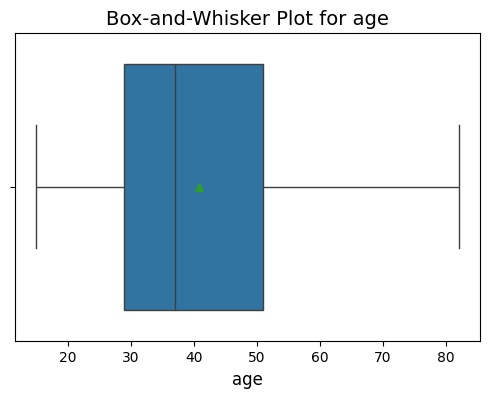

In [6]:
# Doing the age column as the only continous value column
MyCustDataSciLib.visualize_outliers(df, 'age')
# reminder for me,
    # the line in the box is the median
    # the green triangle is the mean

# there are no outliers in the age column 

## Descriptive Stat

In [7]:
# Descriptive statistics for numerical columns in entire df
# Age is the only column with continuous value so descriptive analysis will work better on it

df.describe()
'''
the youngest age is 15
the oldest age is 82
Median age is 37 with avg 40 which is higher than the median thus slightly skew to older, thus implying few very old individuals moving moving the avg older
std of 15 means 68% of the data falls within 1 std between 40+-15 so between 25 and 56
'''

'\nthe youngest age is 15\nthe oldest age is 82\nMedian age is 37 with avg 40 which is higher than the median thus slightly skew to older, thus implying few very old individuals moving moving the avg older\nstd of 15 means 68% of the data falls within 1 std between 40+-15 so between 25 and 56\n'

In [8]:
# find the mode 
df['age'].mode()

# mode is 31

0    31
Name: age, dtype: int64

## Histogram

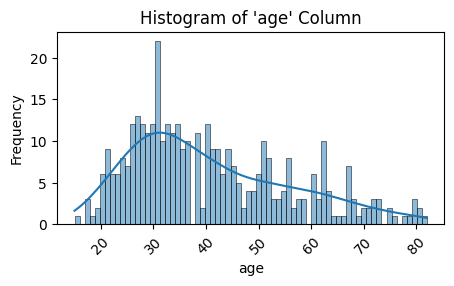

In [9]:
# since youngest is 15 and oldest is 82 the difference is 67 so will make 70 bins
MyCustDataSciLib.quick_histogram(df, 'age', histo_bins=70)
# we can see most of the age groups are around the 30 years mark with 31 years old making up the most people 

## Discoveries

the youngest age is 15

the oldest age is 82

Median age is 37 with avg 40 which is higher than the median thus slightly skew to older, thus implying few very old individuals moving moving the avg older

std of 15 means 68% of the data falls within 1 std between 40+-15 so between 25 and 56

we can see most of the age groups are around the 30 years mark with 31 years old making up the most people 

# Categorical Columns

## Exploring Distribution within Each Column

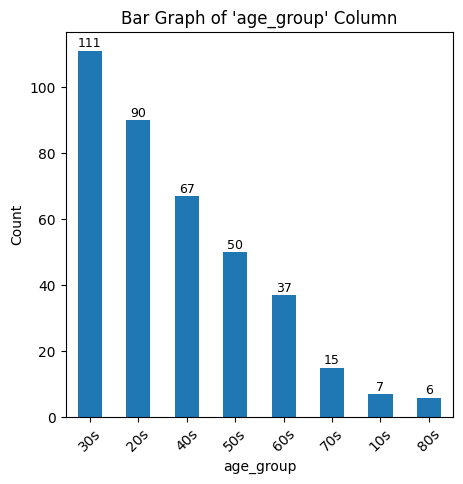

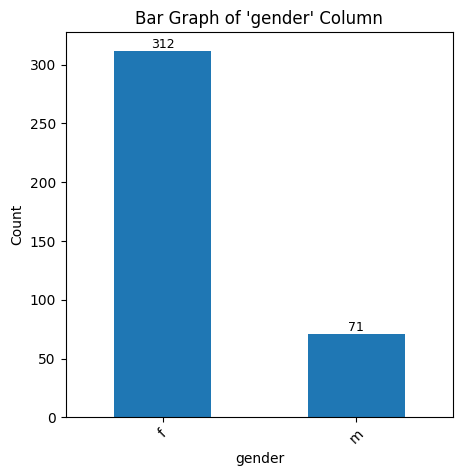

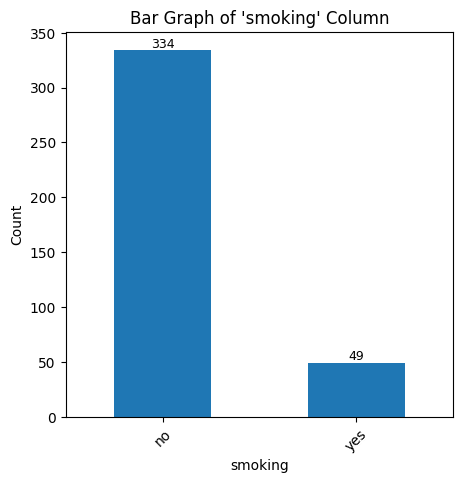

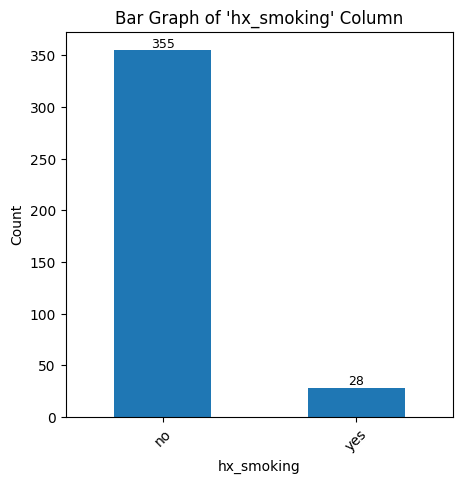

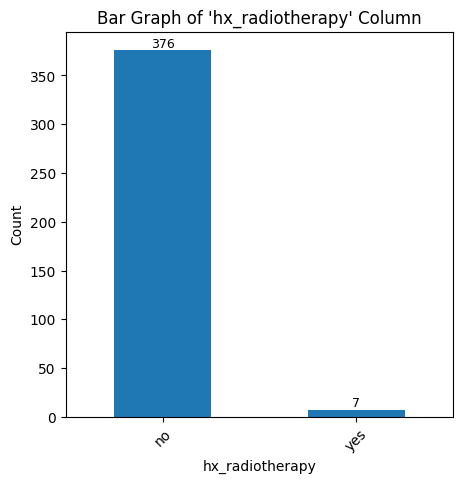

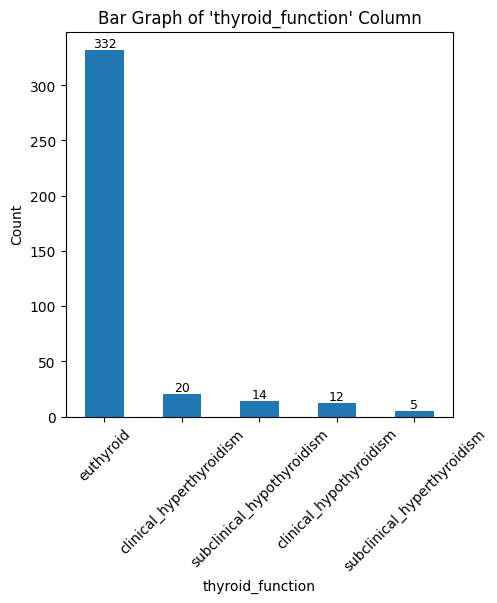

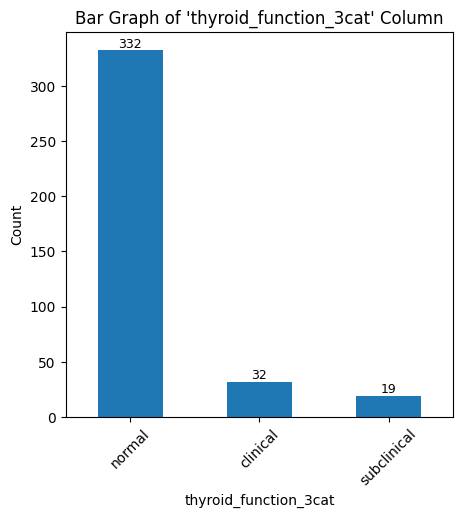

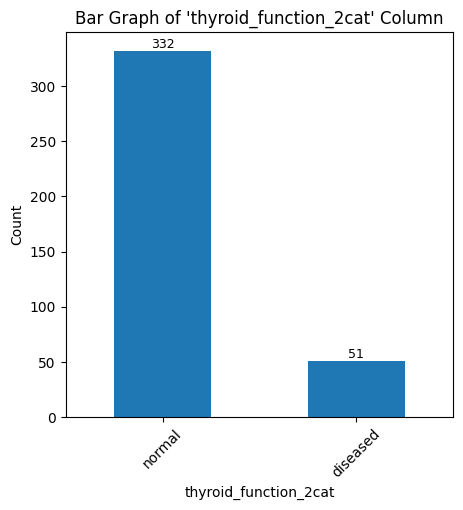

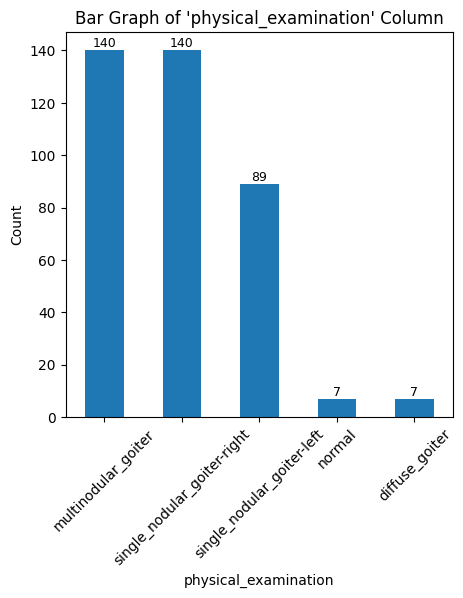

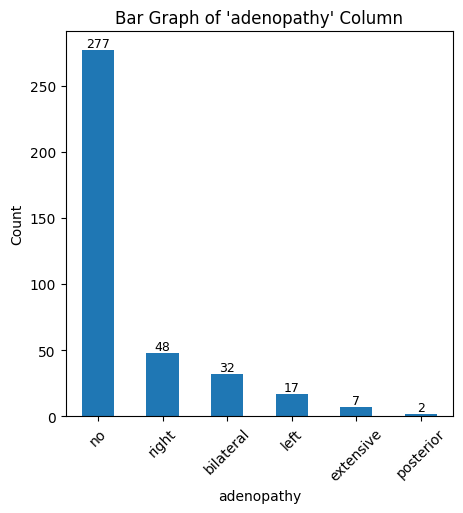

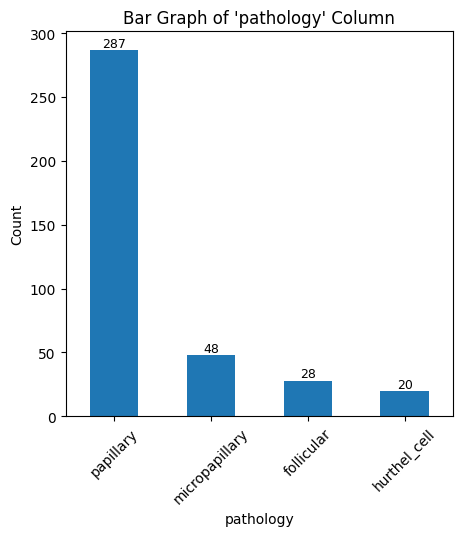

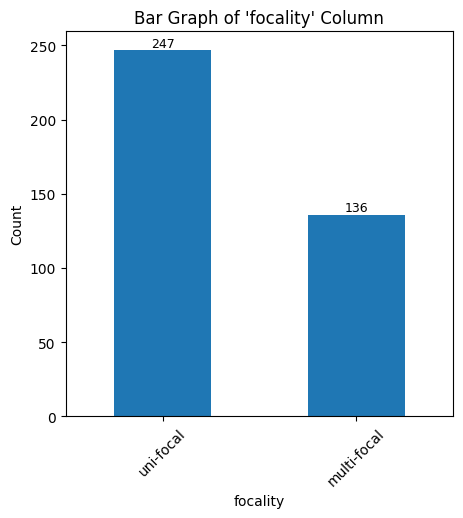

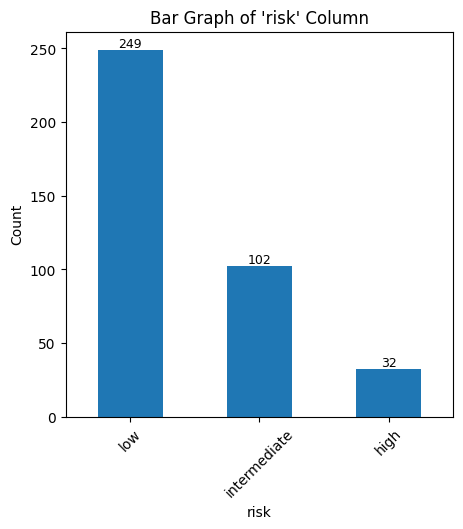

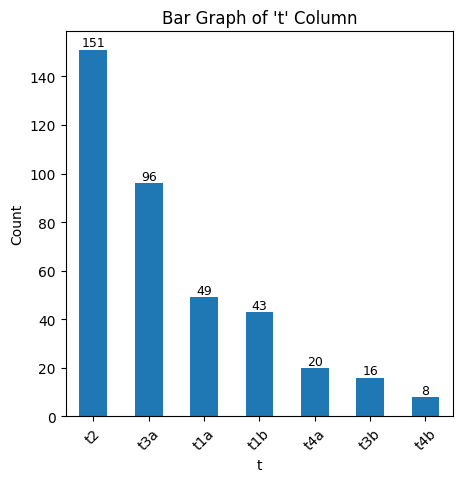

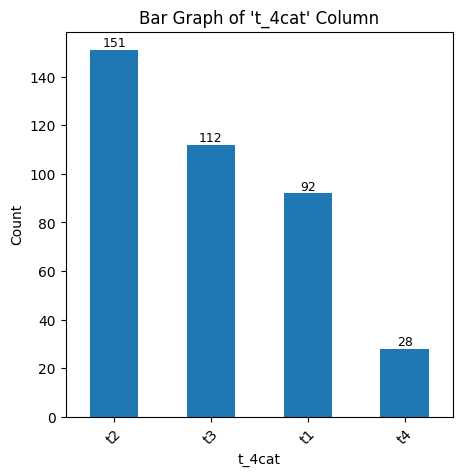

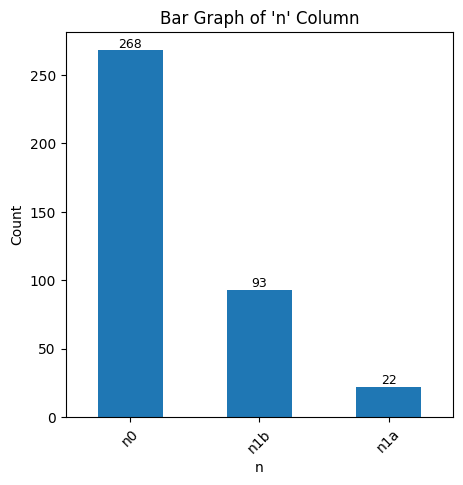

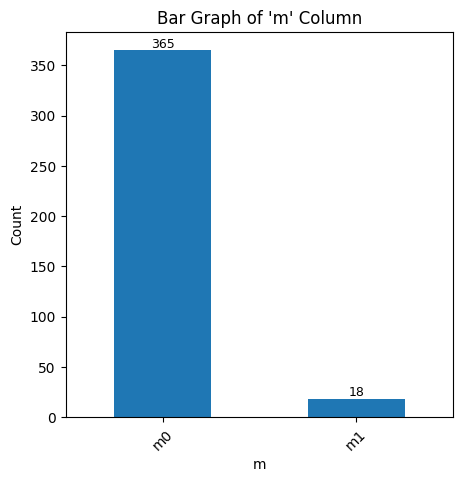

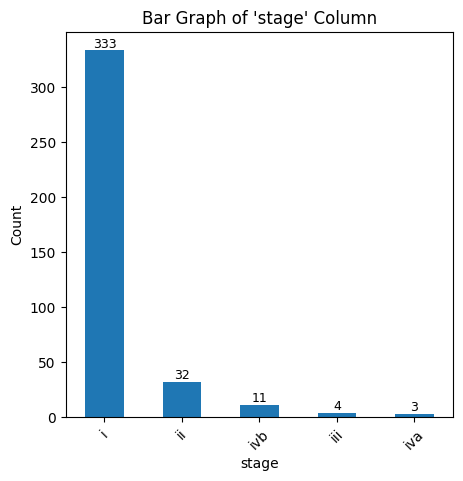

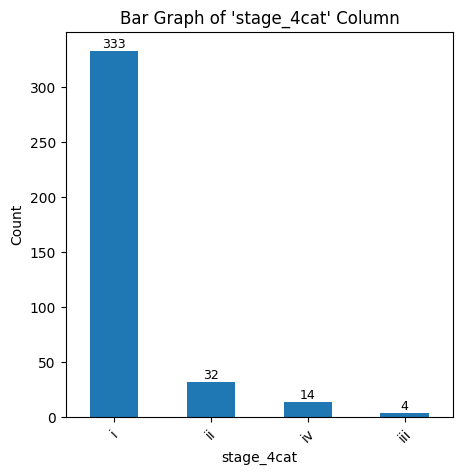

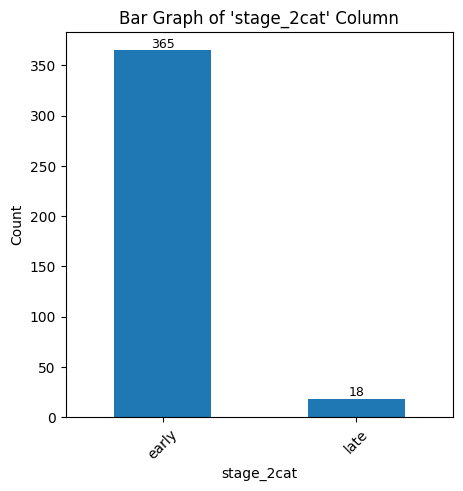

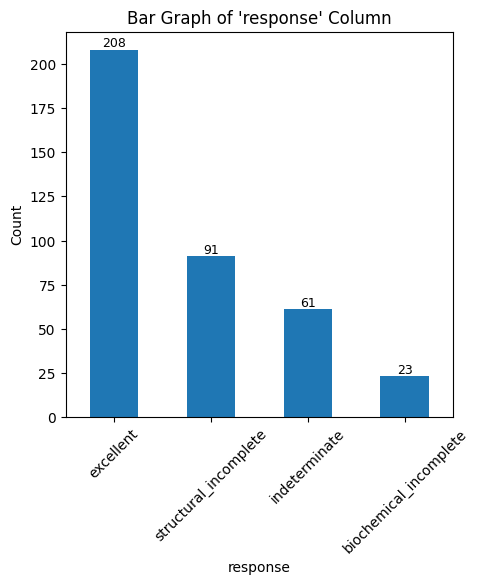

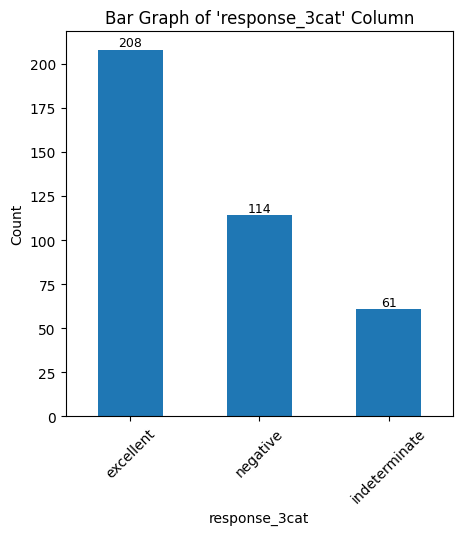

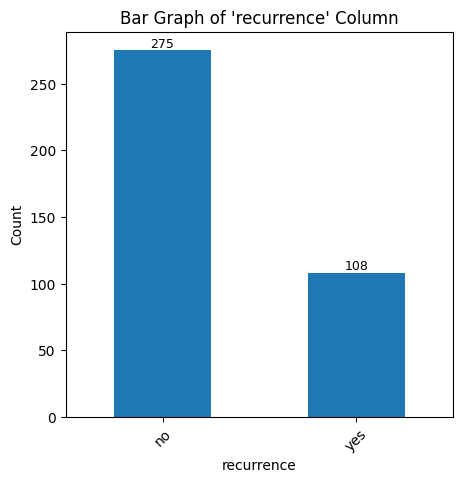

In [10]:
# I want to see the count / distribution and roughly the proportion of values within each column as a way to explore the data

MyCustDataSciLib.quick_plot_all_categorical_col(df)

# it appears alot of the categorical columns are imbalance

## Discoveries

From the bar graphs, it appears alot of the categorical columns have data imbalance.

# Relationships between 2 categorical columns

In [11]:
# will mainly focus on 'recurrence' as that will be our main feature for labeling if correct or not in modeling

In [12]:
# Chi square testing if any column have significant value (smaller than 0.05 p value) with 'recurrence'
list_of_signifigant_col_relationship = MyCustDataSciLib.chi_square_test_all_col(df, 'recurrence', columns='all')

chi_square_testing between 'recurrence' and 'age_group'
Chi-square Statistic: 41.80381126591044
p-value: 5.67238400264022e-07 , which is TRUE
Degrees of Freedom: 7

chi_square_testing between 'recurrence' and 'gender'
Chi-square Statistic: 39.396676469993665
p-value: 3.4588517738589313e-10 , which is TRUE
Degrees of Freedom: 1

chi_square_testing between 'recurrence' and 'smoking'
Chi-square Statistic: 40.34407383079646
p-value: 2.1295039258824545e-10 , which is TRUE
Degrees of Freedom: 1

chi_square_testing between 'recurrence' and 'hx_smoking'
Chi-square Statistic: 5.977474414669837
p-value: 0.014489737063609615 , which is TRUE
Degrees of Freedom: 1

chi_square_testing between 'recurrence' and 'hx_radiotherapy'
Chi-square Statistic: 8.9360505479056
p-value: 0.002795966115812055 , which is TRUE
Degrees of Freedom: 1

chi_square_testing between 'recurrence' and 'thyroid_function'
Chi-square Statistic: 5.148686939194971
p-value: 0.2723786854039181 , which is FALSE
Degrees of Freedom: 4


In [13]:
# List of categorical columns that may have potential dependencies with recurrence
list_of_signifigant_col_relationship

[('recurrence', 'age_group'),
 ('recurrence', 'gender'),
 ('recurrence', 'smoking'),
 ('recurrence', 'hx_smoking'),
 ('recurrence', 'hx_radiotherapy'),
 ('recurrence', 'physical_examination'),
 ('recurrence', 'adenopathy'),
 ('recurrence', 'pathology'),
 ('recurrence', 'focality'),
 ('recurrence', 'risk'),
 ('recurrence', 't'),
 ('recurrence', 't_4cat'),
 ('recurrence', 'n'),
 ('recurrence', 'm'),
 ('recurrence', 'stage'),
 ('recurrence', 'stage_4cat'),
 ('recurrence', 'stage_2cat'),
 ('recurrence', 'response'),
 ('recurrence', 'response_3cat')]

Proportion of 'age_group' Categories Across 'recurrence'


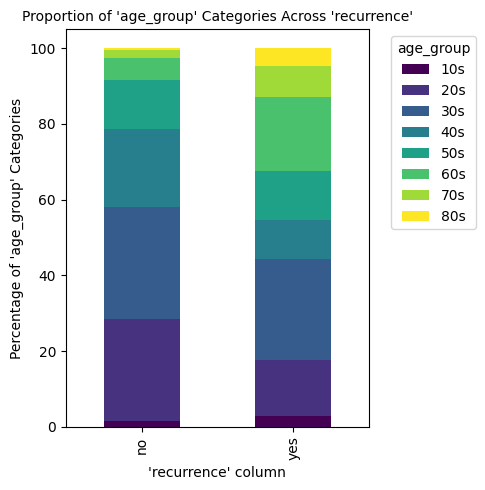

Proportion of 'gender' Categories Across 'recurrence'


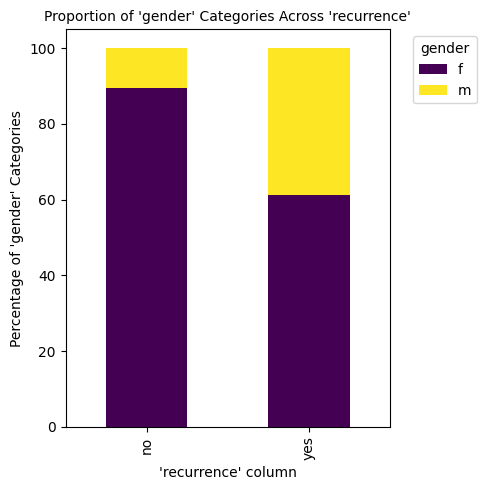

Proportion of 'smoking' Categories Across 'recurrence'


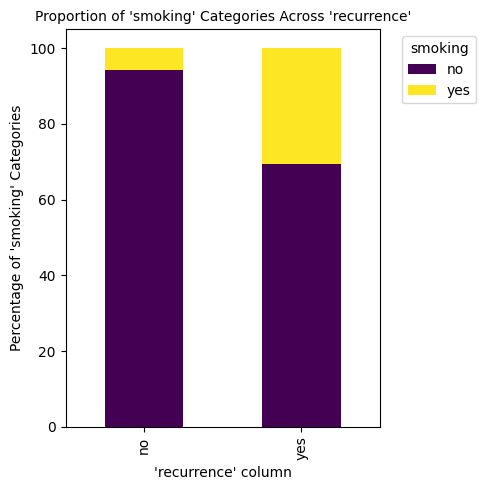

Proportion of 'hx_smoking' Categories Across 'recurrence'


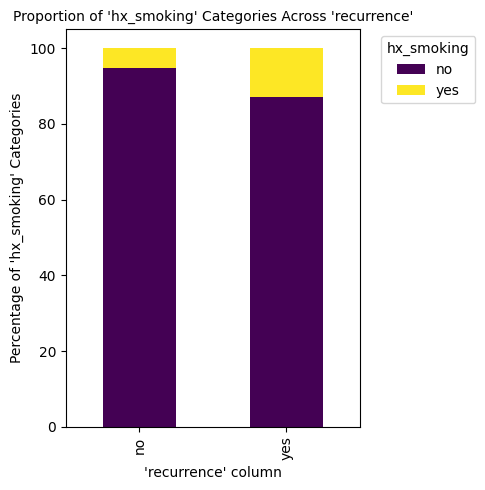

Proportion of 'hx_radiotherapy' Categories Across 'recurrence'


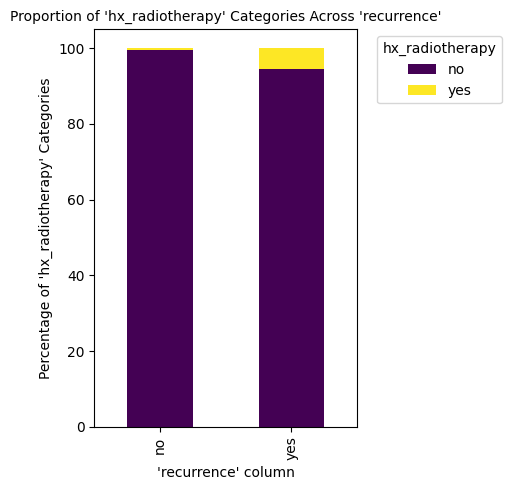

Proportion of 'thyroid_function' Categories Across 'recurrence'


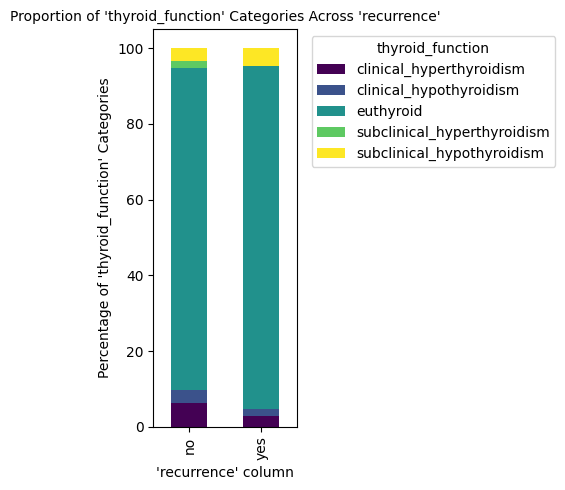

Proportion of 'thyroid_function_3cat' Categories Across 'recurrence'


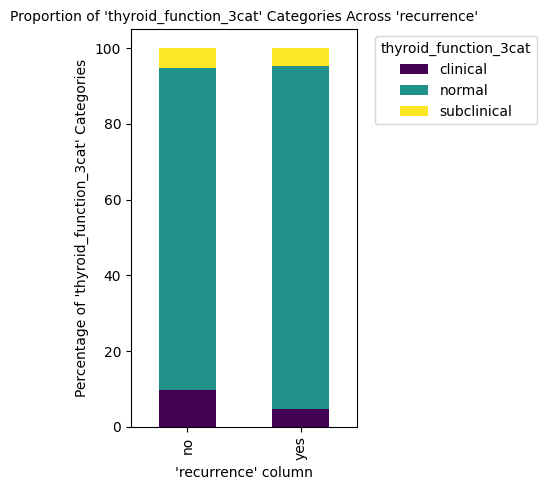

Proportion of 'thyroid_function_2cat' Categories Across 'recurrence'


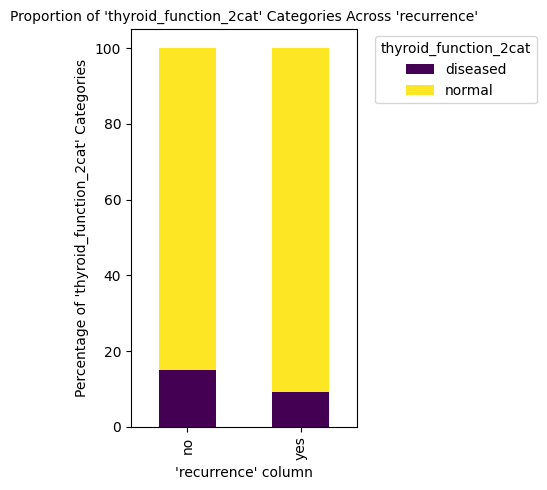

Proportion of 'physical_examination' Categories Across 'recurrence'


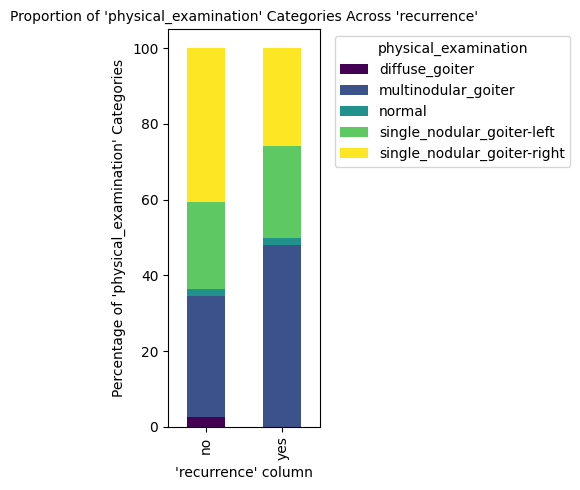

Proportion of 'adenopathy' Categories Across 'recurrence'


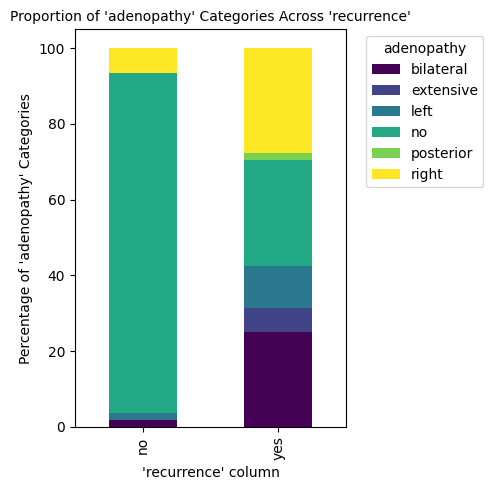

Proportion of 'pathology' Categories Across 'recurrence'


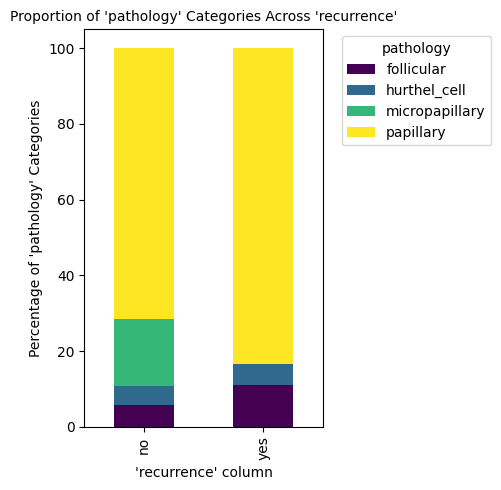

Proportion of 'focality' Categories Across 'recurrence'


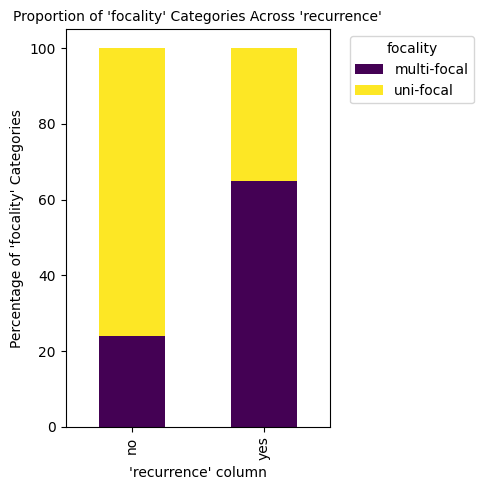

Proportion of 'risk' Categories Across 'recurrence'


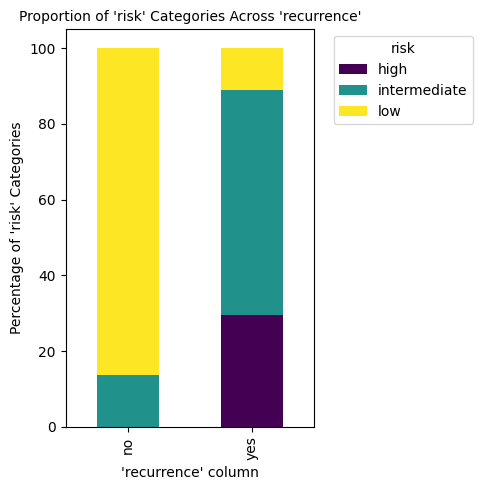

Proportion of 't' Categories Across 'recurrence'


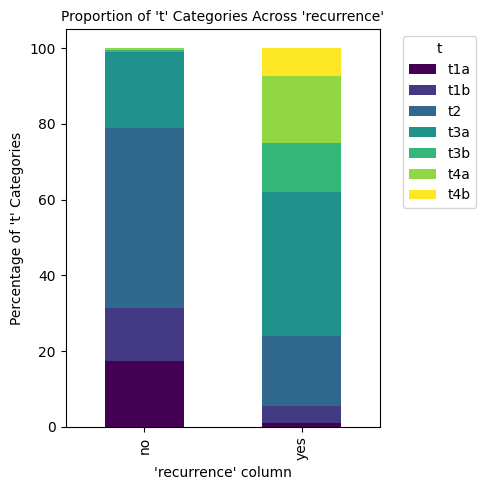

Proportion of 't_4cat' Categories Across 'recurrence'


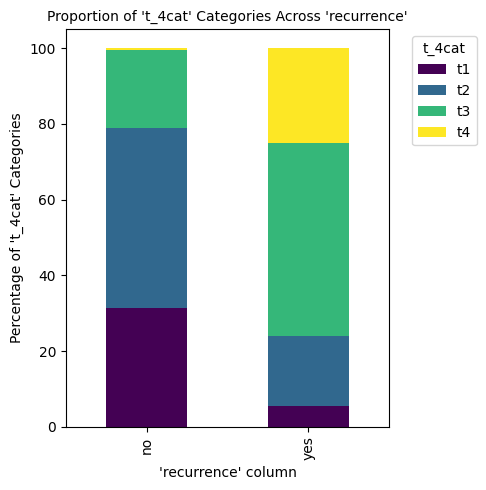

Proportion of 'n' Categories Across 'recurrence'


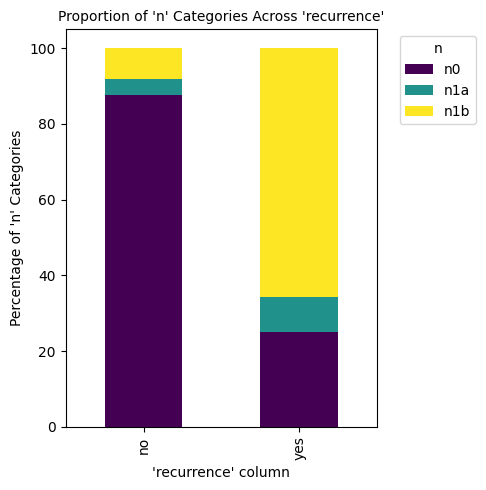

Proportion of 'm' Categories Across 'recurrence'


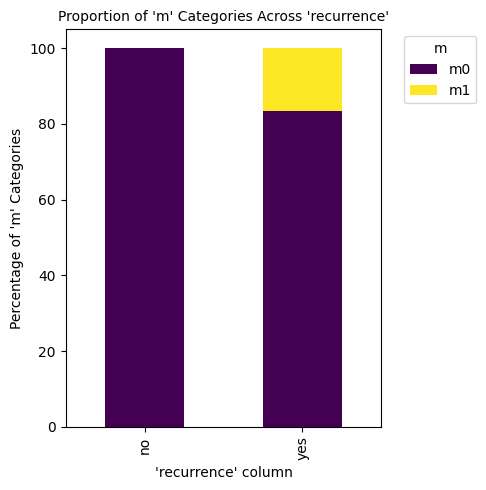

Proportion of 'stage' Categories Across 'recurrence'


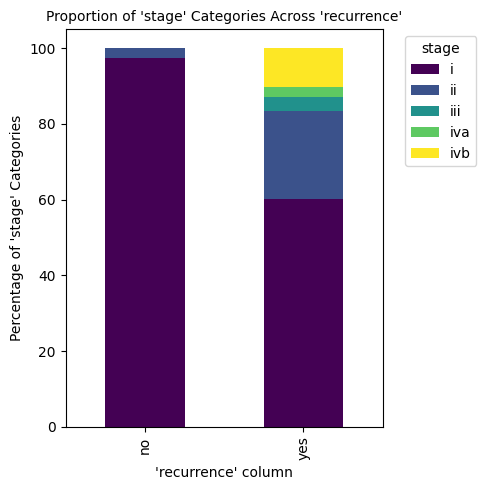

Proportion of 'stage_4cat' Categories Across 'recurrence'


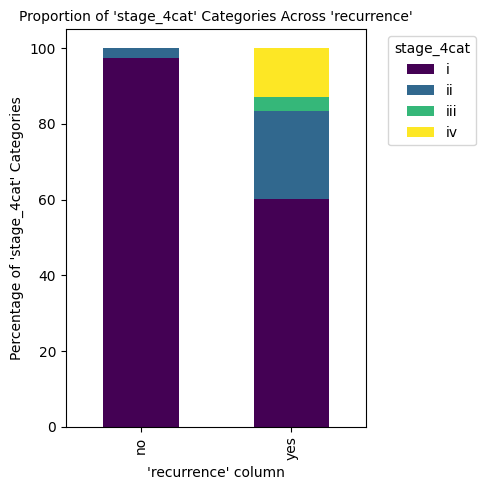

Proportion of 'stage_2cat' Categories Across 'recurrence'


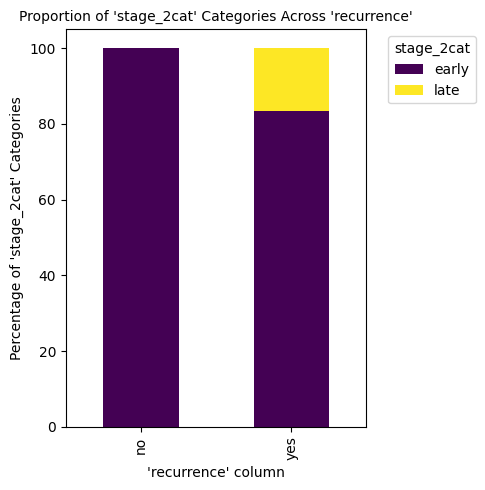

Proportion of 'response' Categories Across 'recurrence'


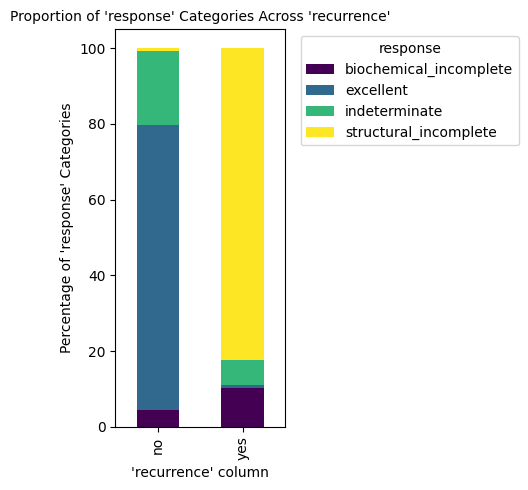

Proportion of 'response_3cat' Categories Across 'recurrence'


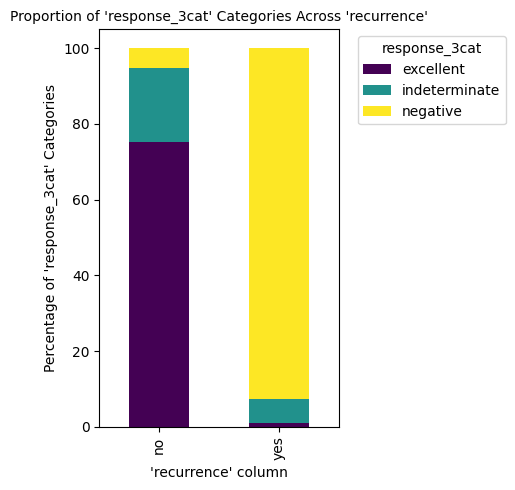

In [14]:
# testing stacked bar graphs
    # needs all main columns on x axis to show different distribution to show that x axis feature has a cause and effect of sorts on the y axis feature
    # after the x axis columns are not distribute equally then see if makes even split or if skewed to a method

MyCustDataSciLib.quick_plot_all_stacked_bar(df, 'recurrence', (5,5))

## Discoveries

Stacked graphs of interest that show difference in distribution among the categories of 'recurrence' : 
- age_group
- gender
- smoking
- physical_examination
- adenopathy
- pathology
- focality
- risk
- t
- t_4cat
- n
- m
- stage
- stage_4cat
- stage_2cat
- response
- response_3cat

# Heat Map of Categorical Columns

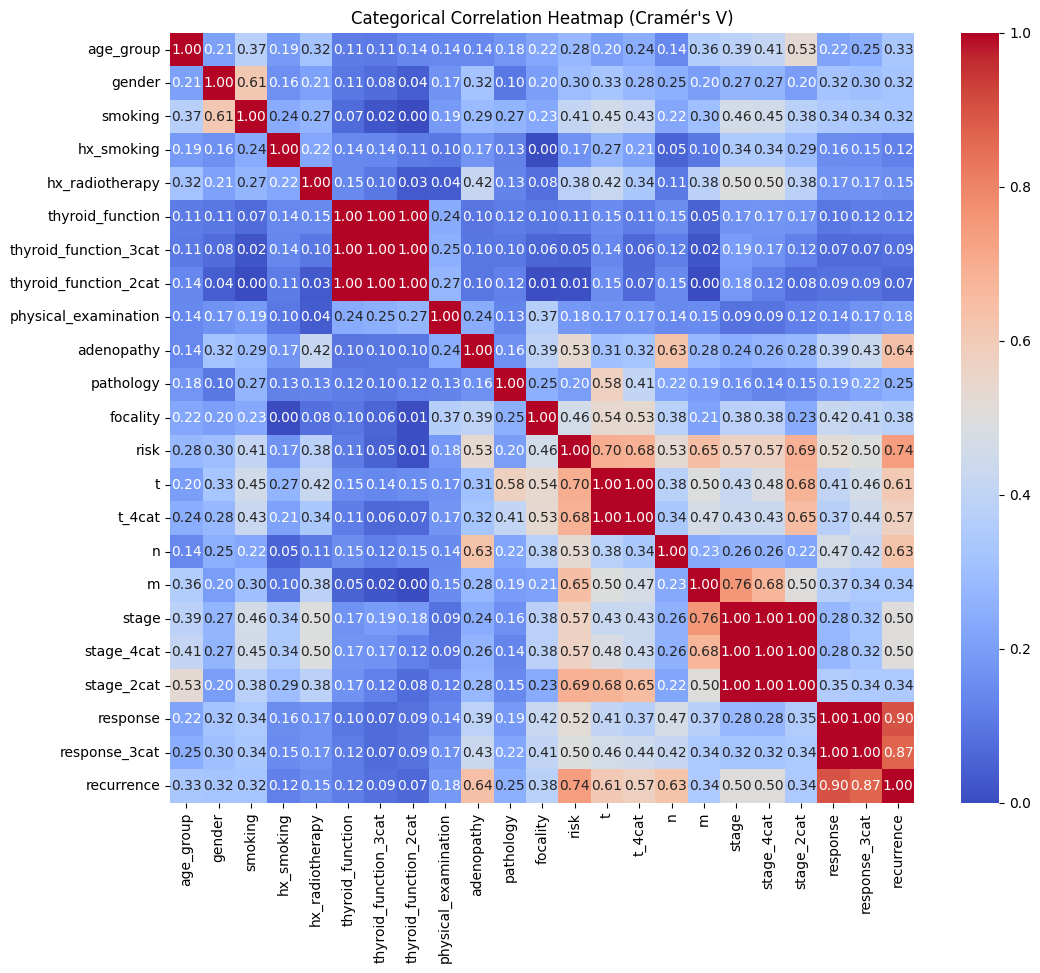

In [21]:
'''
Reminder for me:
Cramér's V is a statistical measure used to assess the strength of association between two categorical variables. It is based on the chi-squared statistic and provides a value between 0 and 1, where 1 is high 'association'
'Association' means that the 2 variables are connected in some way and will affect each other, BUT unknown if the effect is direct or inverse. 
The measure is symmetric, so the association between A and B is the same as between B and A.
It does not measure directionality (unlike Pearson's correlation for continuous variables). This means Cramér's V only indicates the strength of the relationship, not whether it is positive or negative.

Strong association is Cramér’s V > 0.5  The two variables are closely linked. Changes or patterns in one variable are highly related to changes in the other
Weak Association Cramér’s V < 0.3 The two variables are loosely connected or mostly independent.
'''

strong_associations = MyCustDataSciLib.categorical_correlation_heatmap(df, columns='all')

In [30]:
strong_associations_s = pd.Series(strong_associations)

strong_associations_s

0           (age_group, stage_2cat, 0.5310185430112483)
1                 (gender, smoking, 0.6118282712668699)
2        (thyroid_function, thyroid_function_3cat, 1.0)
3        (thyroid_function, thyroid_function_2cat, 1.0)
4     (thyroid_function_3cat, thyroid_function_2cat,...
5                (adenopathy, risk, 0.5336776850356415)
6                   (adenopathy, n, 0.6326090592074621)
7          (adenopathy, recurrence, 0.6403415643744954)
8                    (pathology, t, 0.5769490880764226)
9                     (focality, t, 0.5389647576638683)
10               (focality, t_4cat, 0.5313798768773952)
11                        (risk, t, 0.6966928833195711)
12                   (risk, t_4cat, 0.6846735252832609)
13                        (risk, n, 0.5274913937416723)
14                        (risk, m, 0.6475594749861306)
15                    (risk, stage, 0.5731613433350519)
16               (risk, stage_4cat, 0.5731613433350519)
17               (risk, stage_2cat, 0.6911842848

In [32]:
# dropping duplicate data
strong_associations_s_filtered = strong_associations_s.drop([2,3,4,20,29,30,32,34]).reset_index(drop=False)

strong_associations_s_filtered

,index,0
0,0,"(age_group, stage_2cat, 0.5310185430112483)"
1,1,"(gender, smoking, 0.6118282712668699)"
2,5,"(adenopathy, risk, 0.5336776850356415)"
3,6,"(adenopathy, n, 0.6326090592074621)"
4,7,"(adenopathy, recurrence, 0.6403415643744954)"
5,8,"(pathology, t, 0.5769490880764226)"
6,9,"(focality, t, 0.5389647576638683)"
7,10,"(focality, t_4cat, 0.5313798768773952)"
8,11,"(risk, t, 0.6966928833195711)"
9,12,"(risk, t_4cat, 0.6846735252832609)"


## Discoveries

I will be checking to see which features have strong associations with each other, but mainly focusing on 'recurrence' as that is what we will be used for label in training.

Features with strong associations with recurrence from most to least
- response_3cat, recurrence,    0.8653834383388341
- risk, recurrence,             0.7384024161601291
- adenopathy, recurrence,       0.6403415643744954
- n, recurrence,                0.6324282093356579
- t, recurrence,                0.6073747079480377
- t_4cat, recurrence,           0.5749114209601356
- stage, recurrence,            0.5048536519744431
- stage_4cat, recurrence,       0.5048536519744431


Merging the 'response' column into 'response_3cat' was a good move as combining both negative categories together gave it more variance info. However that column is related to post treatment and the goal of this project is to make a predictive model that is pretreatment based on info from examination.

'Risk' column has high association, but that feature is inputted vaguely by the doctor.

'Adenopathy' and 'n' column has high association and can work as is less vague and more clear observation based. Both are similar as related to the observations of the appearance of the disease.

It seems merging the 't' column into 4 categories made it have slight weaker association with recurrence. This means that the different sub categories in the 't' column does contain important variance info.

It seems merging the 'stage' column into 4 categories has no difference.


# Relationships between 2 numeric columns

In [16]:
# not needed as only 1 numeric column

# Heat Map of Numeric Columns

In [17]:
# this correlation heat map is for numeric columns only 
    # not needed as only 1 numeric column
'''
# Correlation heatmap for a set of numerical variables
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()
'''

"\n# Correlation heatmap for a set of numerical variables\nsns.heatmap(df.corr(), annot=True, cmap='coolwarm')\nplt.show()\n"

# Relationships between numeric vs categorical columns 

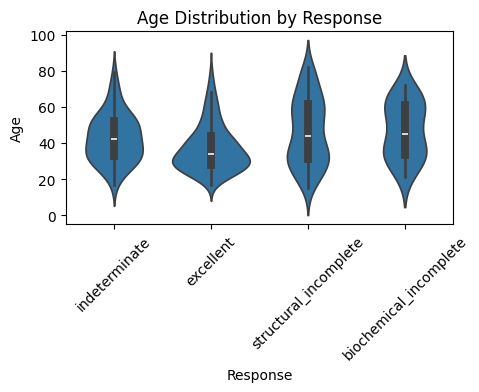

In [18]:
# Violin plot for `age` vs `response`
plt.figure(figsize=(5, 2.5))
sns.violinplot(x='response', y='age', data=df)
plt.title('Age Distribution by Response')
plt.xlabel('Response')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

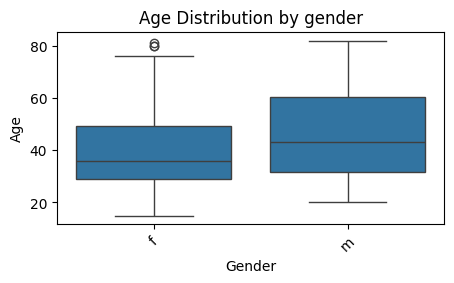

In [19]:
plt.figure(figsize=(5, 2.5))
sns.boxplot(x='gender', y='age', data=df)
plt.title('Age Distribution by gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

In [20]:
# Box plot for `age` vs `thyroid_function`
plt.figure(figsize=(5, 2.5))
sns.boxplot(x='thyroid_function_merge', y='age', data=df)
plt.title('Age Distribution by Thyroid Function')
plt.xlabel('Thyroid Function')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

ValueError: Could not interpret value `thyroid_function_merge` for `x`. An entry with this name does not appear in `data`.

<Figure size 500x250 with 0 Axes>

In [ ]:
plt.figure(figsize=(5, 2.5))
sns.scatterplot(x='age', y='response', data=df)
plt.title('Age Distribution by Response')
plt.xlabel('Age')
plt.ylabel('Response')
plt.xticks(rotation=45)
plt.show()

## Discoveries

dxsfdsf